# TATA STOCK

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\rhtkm\Downloads\Accounts Balance Sheet\TATAMOTORS.NS.csv', encoding='unicode_escape')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,411.850006,413.000000,403.200012,404.950012,403.691833,8966503
1,2017-09-19,415.000000,427.700012,414.000000,423.649994,422.333710,28208471
2,2017-09-20,422.750000,422.750000,413.000000,414.799988,413.511200,5179160
3,2017-09-21,415.399994,418.450012,408.799988,413.649994,412.364777,6946502
4,2017-09-22,414.000000,422.149994,408.850006,411.799988,410.520508,9781308


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1.head()

0    404.950012
1    423.649994
2    414.799988
3    413.649994
4    411.799988
Name: Close, dtype: float64

In [6]:
df1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1484 entries, 0 to 1483
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1484 non-null   float64
dtypes: float64(1)
memory usage: 11.7 KB


In [7]:
df1.shape

(1484,)

In [8]:
import matplotlib.pyplot as plt

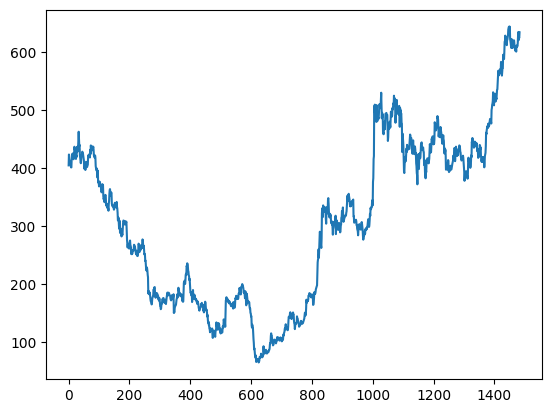

In [9]:
plt.plot(df1)

***Convert df1 to 2D np array and scale between 0 & 1***

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler(feature_range=(0, 1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.58661488],
       [0.61891192],
       [0.60362693],
       ...,
       [0.96822113],
       [0.9659758 ],
       [0.98264251]])

In [13]:
df1.shape

(1484, 1)

***Split df1(1484)=train_data(964)+test_data(520)***

In [14]:
training_size=int(len(df1)*0.65)

In [15]:
training_size

964

In [16]:
test_size=len(df1)-training_size

In [17]:
test_size

520

In [18]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
len(train_data)

964

In [20]:
train_data[0:100,0]

array([0.58661488, 0.61891192, 0.60362693, 0.60164076, 0.59844559,
       0.59222801, 0.59749569, 0.5865285 , 0.58048359, 0.58065631,
       0.60569949, 0.6187392 , 0.61830742, 0.62098448, 0.62227981,
       0.61882558, 0.60483593, 0.61286701, 0.62089809, 0.64205526,
       0.63385146, 0.6354059 , 0.62461143, 0.61735752, 0.60578583,
       0.61597585, 0.61157168, 0.62970639, 0.6411917 , 0.62711572,
       0.64326426, 0.63834197, 0.66044908, 0.68670121, 0.6676166 ,
       0.64404148, 0.64740933, 0.61701208, 0.60932645, 0.60276337,
       0.59300518, 0.60129537, 0.61571674, 0.6177893 , 0.6199482 ,
       0.62746116, 0.62340243, 0.62210709, 0.61502591, 0.60561316,
       0.60215893, 0.58523316, 0.5761658 , 0.5843696 , 0.58195165,
       0.57297063, 0.58151987, 0.59732297, 0.59559585, 0.58989639,
       0.58143354, 0.58221071, 0.58687394, 0.58808289, 0.61278068,
       0.61709847, 0.61398963, 0.61606219, 0.61986186, 0.61683941,
       0.61019   , 0.63307429, 0.62029364, 0.64594127, 0.63661

In [21]:
x_train=[]
y_train=[]
for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)  

In [22]:
x_test=[]
y_test=[]
for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])
    y_test.append(test_data[i,0])
x_test, y_test=np.array(x_test) , np.array(y_test)    

In [23]:
x_train.shape[0]

864

In [24]:
x_train.shape[1]

100

In [25]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [26]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

***Model***

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 24s 562ms/step - loss: 0.0187 - val_loss: 0.0973
Epoch 2/100
14/14 [==============================] - 5s 331ms/step - loss: 0.0044 - val_loss: 0.0189
Epoch 3/100
14/14 [==============================] - 5s 326ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 4/100
14/14 [==============================] - 5s 327ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 5/100
14/14 [==============================] - 4s 312ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 6/100
14/14 [==============================] - 4s 305ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 7/100
14/14 [==============================] - 4s 268ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 8/100
14/14 [==============================] - 4s 264ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 9/100
14/14 [==============================] - 4s 256ms/step - loss: 9.8276e-04 - val_loss: 0.0057
Epoch 10/100
14/14 [==============================] - 4s 255ms/step - loss: 9.2131e-04

In [35]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

14/14 [==============================] - 3s 55ms/step


In [36]:
test_predict

array([[0.7060513 ],
       [0.70770156],
       [0.72337055],
       [0.72970265],
       [0.73444295],
       [0.74045455],
       [0.74050057],
       [0.75436056],
       [0.74792874],
       [0.75072867],
       [0.7499507 ],
       [0.73481256],
       [0.7039321 ],
       [0.70455045],
       [0.71864986],
       [0.7284405 ],
       [0.74962956],
       [0.7440301 ],
       [0.7356334 ],
       [0.7310776 ],
       [0.7270713 ],
       [0.7203441 ],
       [0.71633387],
       [0.7250281 ],
       [0.7373309 ],
       [0.7323364 ],
       [0.6980472 ],
       [0.7133518 ],
       [0.7274097 ],
       [0.73067284],
       [0.72142714],
       [0.71662223],
       [0.70059794],
       [0.69161505],
       [0.64344436],
       [0.64842796],
       [0.6617911 ],
       [0.6600483 ],
       [0.64367497],
       [0.6144393 ],
       [0.57847303],
       [0.5612702 ],
       [0.5734068 ],
       [0.5988766 ],
       [0.6092691 ],
       [0.60016173],
       [0.5915283 ],
       [0.598

In [37]:
test_predict=scaler.inverse_transform(test_predict)

In [38]:
test_predict

array([[474.1037 ],
       [475.0592 ],
       [484.13156],
       [487.79785],
       [490.54248],
       [494.0232 ],
       [494.04984],
       [502.07477],
       [498.35074],
       [499.9719 ],
       [499.52145],
       [490.75647],
       [472.8767 ],
       [473.2347 ],
       [481.3983 ],
       [487.06708],
       [499.3355 ],
       [496.09344],
       [491.23172],
       [488.59393],
       [486.2743 ],
       [482.37924],
       [480.0573 ],
       [485.09128],
       [492.2146 ],
       [489.32278],
       [469.46936],
       [478.3307 ],
       [486.47025],
       [488.3596 ],
       [483.00632],
       [480.22427],
       [470.94623],
       [465.74512],
       [437.85428],
       [440.7398 ],
       [448.47705],
       [447.468  ],
       [437.98782],
       [421.06036],
       [400.2359 ],
       [390.27545],
       [397.30255],
       [412.04956],
       [418.0668 ],
       [412.79364],
       [407.7949 ],
       [411.98538],
       [421.14096],
       [422.56244],


In [39]:
len(test_data)

520

In [47]:
x_input=test_data[420:].reshape(1,-1)   #reshape(1,-1)=transpose

In [48]:
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=100
i=0

In [51]:
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)        

[[0.9198118448257446], [0.8845640420913696], [0.8457706570625305], [0.8162080645561218], [0.7958647012710571], [0.7821934819221497], [0.7722906470298767], [0.7637311220169067], [0.7549493312835693], [0.7452534437179565], [0.7346173524856567], [0.7233973145484924], [0.7120699882507324], [0.7010532021522522], [0.6906185150146484], [0.680877149105072], [0.6718140244483948], [0.6633377075195312], [0.6553300619125366], [0.6476797461509705], [0.6403031945228577], [0.6331489682197571], [0.6261938810348511], [0.6194343566894531], [0.612876832485199], [0.6065302491188049], [0.6004003286361694], [0.5944880843162537], [0.5887892246246338], [0.5832954049110413]]


In [55]:
lst_output=scaler.inverse_transform(lst_output)
lst_output.reshape(1,-1)

array([[1.16071404e+11, 1.12110026e+11, 1.07750173e+11, 1.04427736e+11,
        1.02141416e+11, 1.00604956e+11, 9.94920106e+10, 9.85300354e+10,
        9.75430805e+10, 9.64533935e+10, 9.52580403e+10, 9.39970593e+10,
        9.27240205e+10, 9.14858823e+10, 9.03131642e+10, 8.92183660e+10,
        8.81997930e+10, 8.72471693e+10, 8.63472179e+10, 8.54874255e+10,
        8.46584006e+10, 8.38543620e+10, 8.30727040e+10, 8.23130246e+10,
        8.15760473e+10, 8.08627769e+10, 8.01738565e+10, 7.95094000e+10,
        7.88689250e+10, 7.82514937e+10]])